# Brazillian E-commerce Olist (2016-2018)

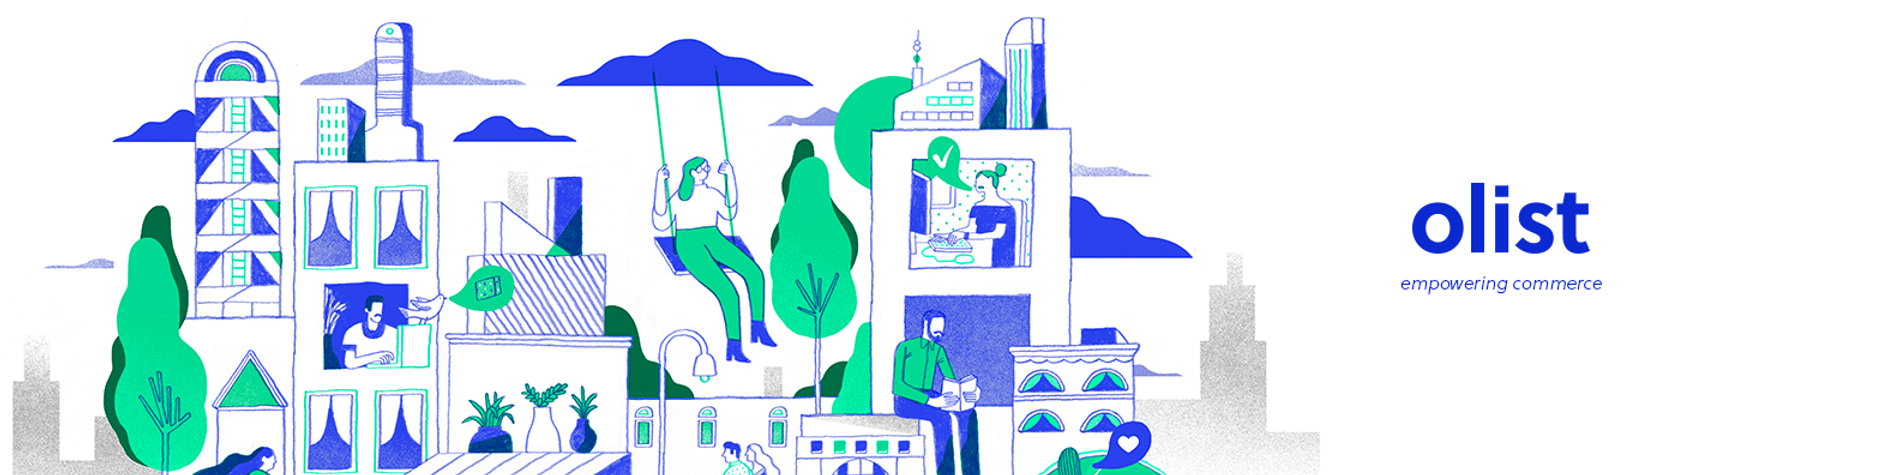

In [ ]:
import pandas as pd
sellers = pd.read_csv('https://raw.githubusercontent.com/dinhtthuha/coderschool/9819443208c88b11aea1fc988a1812b5b5041596/olist_sellers_dataset.csv')
customers = pd.read_csv('https://raw.githubusercontent.com/dinhtthuha/coderschool/main/olist_customers_dataset.csv')
products = pd.read_csv('https://raw.githubusercontent.com/dinhtthuha/coderschool/main/olist_products_dataset.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/dinhtthuha/coderschool/main/olist_order_items_dataset.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/dinhtthuha/coderschool/main/olist_orders_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/dinhtthuha/coderschool/main/olist_order_reviews_dataset.csv')
pcn_trans = pd.read_csv('https://raw.githubusercontent.com/dinhtthuha/coderschool/main/product_category_name_translation.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Note-worthy product change over time and space


##1.Product change overview

##1.1. Overview of order reviews

###Customers

In [ ]:
#Overview of customers dataset
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


###Products

In [ ]:
#Overview of product dataset
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [ ]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
#There are 73 product category names in Brazil
products['product_category_name'].nunique()

73

In [ ]:
#Create a new column called volume cm3
products['volume_cm3']=products.product_length_cm*products.product_height_cm*products.product_width_cm
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0


##1.2. Cleaning the data

In [ ]:
# define function to add a column called 'Region' which group cities together
def region(df):
  if df['customer_state'] in ('RR', 'AP', 'AM', 'AC', 'RO', 'PA', 'TO'):
    return 'North'
  elif df['customer_state'] in ('MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE'):
    return 'North East'
  elif df['customer_state'] in ('MT', 'GO', 'MS', 'DF'):
    return 'Mid West'
  elif df['customer_state'] in ('MG', 'SP', 'RJ', 'ES'):
    return 'South East'
  else:
    return 'South'

customers['customer_region'] = customers.apply(region, axis = 1)

In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_region
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,South East
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,South East
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,South East
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,South East
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,South East


In [ ]:
#Filtering out 73 product categories into 26 product categories and creating a new column name 'category_2'
def category(df):
  if df['product_category_name'] == 'cama_mesa_banho':
    return 'Bed, bath, table'
  elif df['product_category_name'] == 'esporte_lazer':
    return 'Sports, leisure'
  elif df['product_category_name'] == 'beleza_saude':
    return 'Health, beauty'
  elif df['product_category_name'] == 'pet_shop':
    return 'Pet shop'

  elif df['product_category_name'] == 'automotivo':
    return 'Auto'
  elif df['product_category_name'] == 'brinquedos':
    return 'Toys'
  elif df['product_category_name'] == 'relogios_presentes':
    return 'Watches, gifts'
  elif df['product_category_name'] == 'bebes':
    return 'Baby'

  elif df['product_category_name'] == 'perfumaria':
    return 'Perfumery'
  elif df['product_category_name'] == 'papelaria':
    return 'Stationery'
  elif df['product_category_name'] == 'cool_stuff':
    return 'Cool stuff'
  elif df['product_category_name'] == 'market_place':
    return 'Market place'

  elif df['product_category_name'] == 'industria_comercio_e_negocios':
    return 'Industry, commerce and business'
  elif df['product_category_name'] in ('informatica_acessorios', 'pcs', 'consoles_games', 'pc_gamer'):
    return 'Computers, games'
  elif df['product_category_name'] == 'eletronicos':
    return 'Electronics'
  elif df['product_category_name'] in ('telefonia', 'telefonia_fixa'):
    return 'Telephony'
  elif df['product_category_name'] in ('fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_roupa_masculina', 'fashion_roupa_feminina', 'fashion_esporte', 'fashion_underwear_e_moda_praia', 'fashion_roupa_infanto_juvenil', 'malas_acessorios'):
    return 'Fashion'

  elif df['product_category_name'] in ('eletrodomesticos', 'eletrodomesticos_2', 'eletroportateis', 'livros_importados', 'climatizacao'):
    return 'Home appliances'
  elif df['product_category_name'] in ('livros_interesse_geral', 'livros_tecnicos', 'portateis_casa_forno_e_cafe'):
    return 'Books'
  elif df['product_category_name'] in ('alimentos_bebidas', 'alimentos','bebidas', 'la_cuisine'):
    return 'Food, drink'
  elif df['product_category_name'] in ('artes', 'artes_e_artesanato', 'tablets_impressao_imagem'):
    return 'Arts, printing'

  elif df['product_category_name'] in ('sinalizacao_e_seguranca', 'seguros_e_servicos'):
    return 'Security'
  elif df['product_category_name'] in ('moveis_decoracao', 'moveis_escritorio', 'moveis_sala', 'moveis_quarto', 'moveis_colchao_e_estofado', 'casa_conforto_2', 'casa_conforto'):
    return 'Home office furniture'
  elif df['product_category_name'] in ('construcao_ferramentas_construcao', 'construcao_ferramentas_seguranca', 'construcao_ferramentas_jardim', 'construcao_ferramentas_iluminacao', 'construcao_ferramentas_ferramentas', 'casa_construcao'):
    return 'Construction'
  elif df['product_category_name'] in ('agro_industria_e_comercio', 'flores', 'ferramentas_jardim'):
    return 'Gardening'
  elif df['product_category_name'] in ('artigos_de_natal', 'artigos_de_festas', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'portateis_cozinha_e_preparadores_de_alimentos', 'utilidades_domesticas', 'fraldas_higiene'):
    return 'Housewares, special supplies'
  else:
    return None

products['category_2'] = products.apply(category, axis = 1)

In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_cm3,category_2
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,Perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,"Arts, printing"
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,"Sports, leisure"
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,Baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,"Housewares, special supplies"


In [ ]:
#Merge the order review, orders, products and translation table
product= pd.merge(products,pcn_trans,how='inner', on='product_category_name')
order_p= pd.merge(product,order_items,how='inner',on='product_id')
od= pd.merge(orders,order_p,how='inner',on='order_id')
fl=pd.merge(od,customers,how='inner',on='customer_id')
fl.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_region
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas,...,1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,South East
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,perfumaria,...,1,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,North East
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,automotivo,...,1,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Mid West
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,...,1,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,North East
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,...,1,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,South East


In [ ]:
#Check if there is any duplicates 
fl.duplicated().sum()

0

In [ ]:
#Creating new column based on monthly periods from 2016 to 2018
fl['order_purchase_timestamp']=pd.to_datetime(fl['order_purchase_timestamp'])
fl['per_period']= fl['order_purchase_timestamp'].dt.to_period('M')


##1.3.Simple EDA (Overall)

###EDA based on number of orders (main metric)

In [ ]:
#Top5 product categories having the highest number of orders
top5= fl.groupby('category_2')['order_id'].count().sort_values(ascending=False).head()
top5

category_2
Home office furniture    11139
Bed, bath, table         11115
Health, beauty            9670
Computers, games          9167
Sports, leisure           8641
Name: order_id, dtype: int64

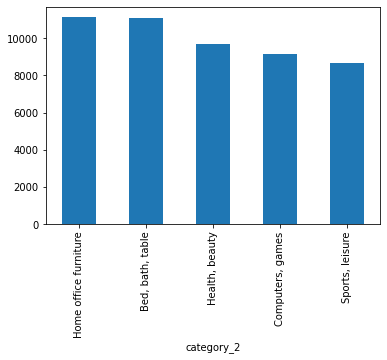

In [ ]:
top5 = fl.groupby('category_2')['order_id'].count().sort_values(ascending=False).head().plot(kind='bar')

It can be seen from the chart that home office furniture and bed bath table have the highest number of orders from 2016 to 2018

In [ ]:
top5_c= fl[fl['category_2'].isin(['Bed, bath, table','Health, beauty','Home office furniture','Sports, leisure','Computers, games'])]
top5_c= top5_c.groupby(['per_period','category_2'])['order_id'].count().reset_index()
top5_c

,per_period,category_2,order_id
0,2016-09,"Health, beauty",3
1,2016-09,Home office furniture,2
2,2016-10,"Bed, bath, table",8
3,2016-10,"Computers, games",31
4,2016-10,"Health, beauty",48
...,...,...,...
102,2018-08,"Bed, bath, table",658
103,2018-08,"Computers, games",493
104,2018-08,"Health, beauty",849
105,2018-08,Home office furniture,531


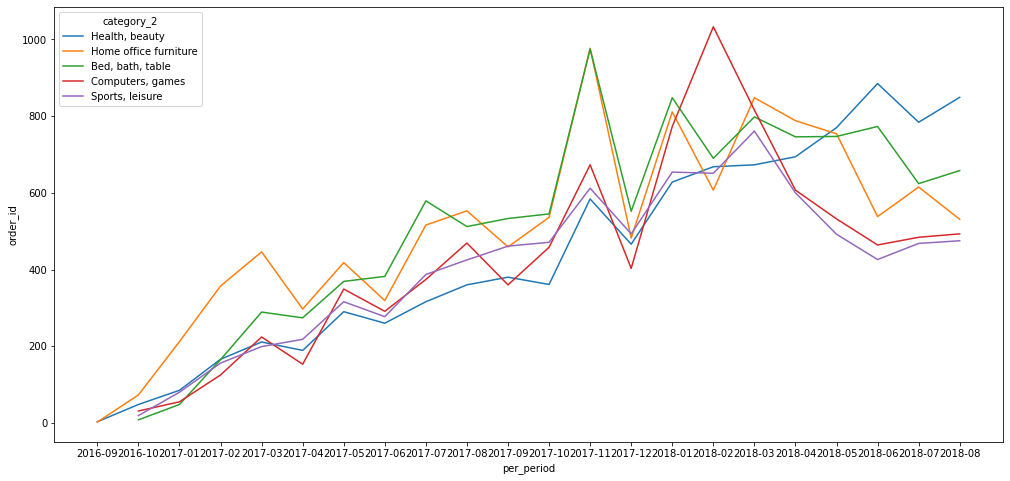

In [ ]:
plt.figure(figsize=(17,8))
sns.lineplot(data=top5_c, 
            x=top5_c['per_period'].astype('str'), 
            y='order_id',
            hue='category_2')

It can be demonstrated from the graph that the number of orders in 5 categories started at Sep/2016 and continued going up and down until reaching their peaks in Nov/2017 (maybe BlackFriday demand)

Also, there were some ongoing trends such as health_beauty products after reaching its 1st peak in Nov/2017, it continued to go up in 2018 and sudden increase in computer_games rising up in Feb/2018. After the 1st peak in Nov/2017, bed bath table, sports leisure and home office furniture slowly went down

###EDA based on total of successful orders (supporting metric)

In [ ]:
fl.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_region,per_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,South East,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,perfumaria,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,North East,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,automotivo,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Mid West,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,North East,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,South East,2018-02


In [ ]:
#Filtering out the orders that have been successfully delivered
delivered= fl[fl.order_status=='delivered']
delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_region,per_period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,utilidades_domesticas,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,South East,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,595fac2a385ac33a80bd5114aec74eb8,perfumaria,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,North East,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,aa4383b373c6aca5d8797843e5594415,automotivo,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Mid West,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,North East,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,South East,2018-02


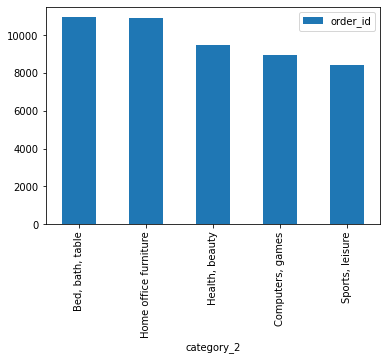

In [ ]:
#Top5 product categories having the top successful orders
top5= delivered.groupby('category_2')['order_id'].count().sort_values(ascending=False).head()
top5.to_frame().plot(kind='bar')

In the top 5 categories mentioned in the bar graph, home office furniture and bed_bad_table products all have the highest number of successful orders



In [ ]:
top5_so= delivered[delivered['category_2'].isin(['Bed, bath, table','Health, beauty','Home office furniture','Sports, leisure','Computers, games'])]
top5_so= top5_so.groupby(['per_period','category_2'])['order_id'].count().reset_index()

In [ ]:
top5_so

,per_period,category_2,order_id
0,2016-09,"Health, beauty",3
1,2016-10,"Bed, bath, table",8
2,2016-10,"Computers, games",19
3,2016-10,"Health, beauty",40
4,2016-10,Home office furniture,71
...,...,...,...
101,2018-08,"Bed, bath, table",655
102,2018-08,"Computers, games",486
103,2018-08,"Health, beauty",835
104,2018-08,Home office furniture,528


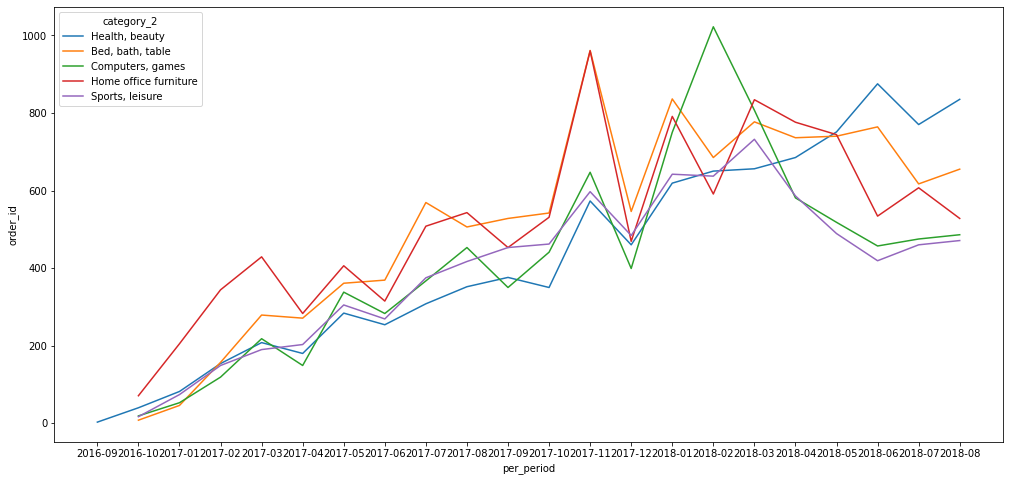

In [ ]:
plt.figure(figsize=(17,8))
sns.lineplot(data=top5_so, 
            x=top5_so['per_period'].astype('str'), 
            y='order_id',
            hue='category_2')

It can be demonstrated from the chart that the total successful orders in 5 categories started at Oct/2016 and continued going up and down until reaching their peaks in Nov/2017 (maybe BlackFriday demand). Their patterns kept increasing but the pace were unstable

After analysizing based on total price, total number of orders and total successful orders, it is clearly stated from most of the charts that Nov/2017 witnessed the sudden rise in categories such as bed_bath_table, health_beauty, computer games and home office furniture. 



Also, customer categories preferences are product categories received highest number of orders (key metric),
and to find the top ones we also refer to list of categories with successful orders as supporting metric.

##1.4. Detailed EDA across Brazillian regions

### Product segmentation based on regions

In [ ]:
#Number of orders in each region
south_east_or = pd.pivot_table(data = fl[fl['customer_region'] == 'South East'], 
                       index = 'customer_region', 
                       columns = 'category_2', 
                       values = 'order_id', aggfunc = 'count') #.T.reset_index()
south_or = pd.pivot_table(data = fl[fl['customer_region'] == 'South'], 
                       index = 'customer_region', 
                       columns = 'category_2', 
                       values = 'order_id', aggfunc = 'count') #.T.reset_index()
mid_west_or = pd.pivot_table(data = fl[fl['customer_region'] == 'Mid West'], 
                       index = 'customer_region', 
                       columns = 'category_2', 
                       values = 'order_id', aggfunc = 'count') #.T.reset_index()
north_or = pd.pivot_table(data = fl[fl['customer_region'] == 'North'], 
                       index = 'customer_region', 
                       columns = 'category_2', 
                       values = 'order_id', aggfunc = 'count') #.T.reset_index()
north_east_or = pd.pivot_table(data = fl[fl['customer_region'] == 'North East'], 
                       index = 'customer_region', 
                       columns = 'category_2', 
                       values = 'order_id', aggfunc = 'count') #.T.reset_index()

In [ ]:
def heatmap(pos, df, title):
  plt.subplot(pos)
  sns.heatmap(df, cmap = 'YlGn')
  plt.subplots_adjust(hspace=0.6)
  plt.xticks([])
  plt.xlabel(None)
  plt.ylabel(None)
  plt.title(title)

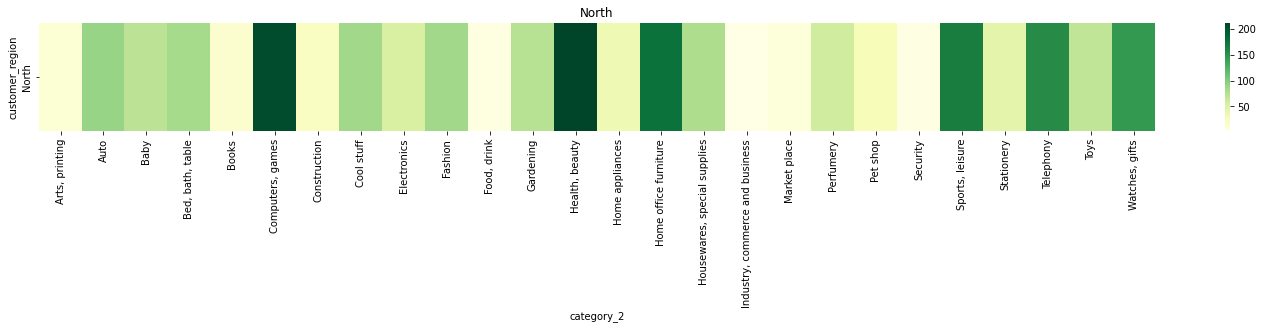

In [ ]:
plt.figure(figsize=(25,2))
sns.heatmap(north_or, cmap = 'YlGn')
plt.title('North')
# plt.xlabel(None)
# plt.ylabel(None)
plt.show()

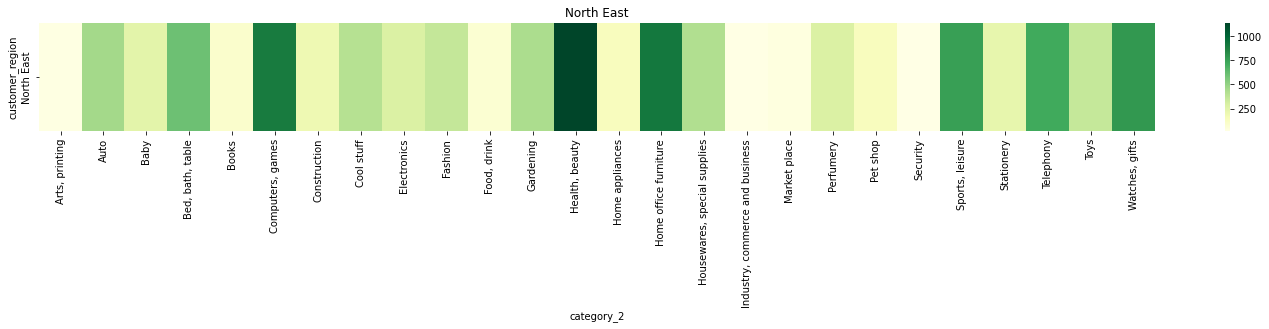

In [ ]:
plt.figure(figsize=(25,2))
sns.heatmap(north_east_or, cmap = 'YlGn')
plt.title('North East')
# plt.xlabel(None)
# plt.ylabel(None)
plt.show()

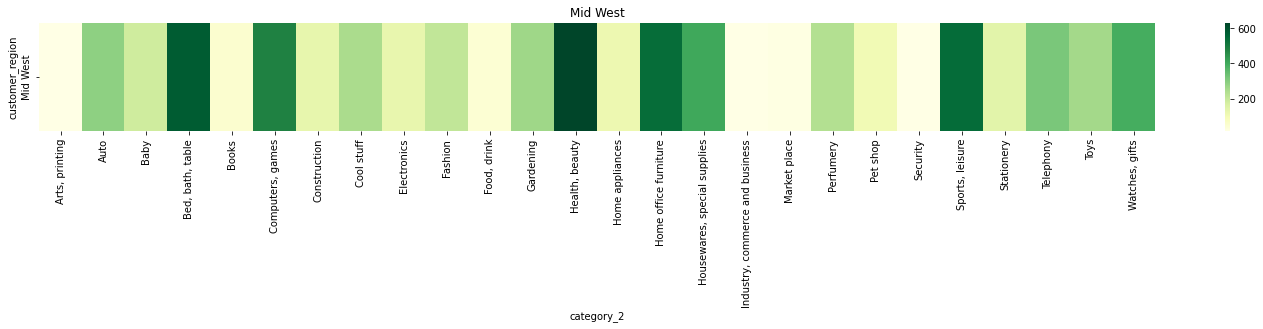

In [ ]:
plt.figure(figsize=(25,2))
sns.heatmap(mid_west_or, cmap = 'YlGn')
plt.title('Mid West')
# plt.xlabel(None)
# plt.ylabel(None)
plt.show()

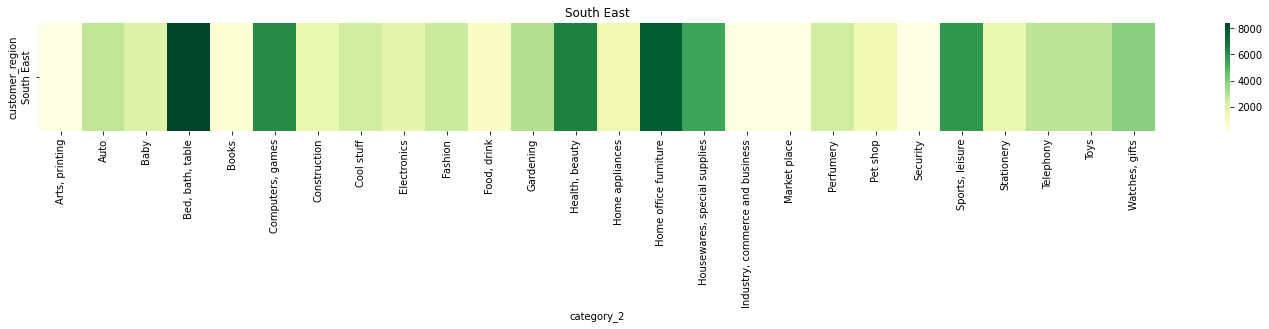

In [ ]:
plt.figure(figsize=(25,2))
sns.heatmap(south_east_or, cmap = 'YlGn')
plt.title('South East')
# plt.xlabel(None)
# plt.ylabel(None)
plt.show()

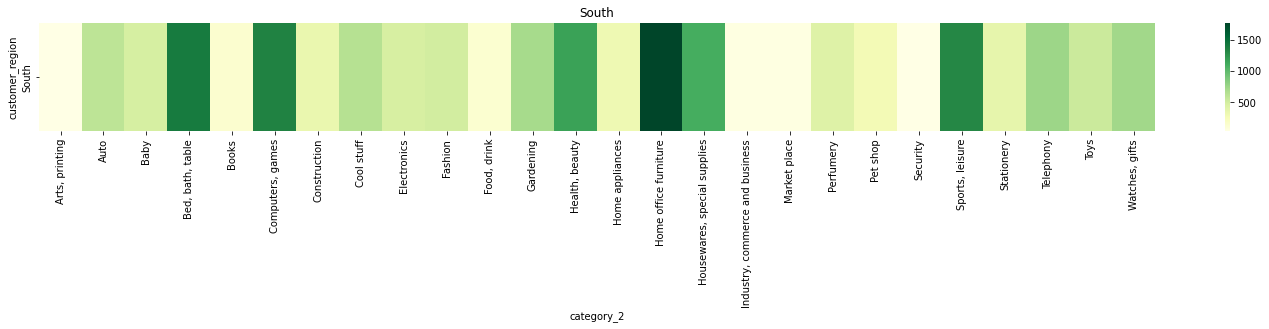

In [ ]:
plt.figure(figsize=(25,2))
sns.heatmap(south_or, cmap = 'YlGn')
plt.title('South')
# plt.xlabel(None)
# plt.ylabel(None)
plt.show()

=> There is a transition in customer's top preferences prodcut category (measured by number of order) from North to South, which moves (region by region) from `computers, games`, to `health beauty`, to `bed bath table`, and to `home office furniture`

###Health_beauty products in 2 years




In [ ]:
#Filter the customers buying health_beauty products in all 5 regions 
beauty= fl[fl.category_2=='Health, beauty']
beauty.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_region,per_period
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28 00:00:00,5ac9d9e379c606e36a8094a6046f75dc,beleza_saude,...,633ecdf879b94b5337cca303328e4a25,2017-09-25 04:04:09,109.90,8.96,d699688533772c15a061e8ce81cb56df,4001,sao paulo,SP,South East,2017-09
21,f848643eec1d69395095eb3840d2051e,4fa1cd166fa598be6de80fa84eaade43,delivered,2018-03-15 08:52:40,2018-03-15 09:09:31,2018-03-15 19:52:48,2018-03-19 18:08:32,2018-03-29 00:00:00,2b4609f8948be18874494203496bc318,beleza_saude,...,cc419e0650a3c5ba77189a1882b7556a,2018-03-23 09:09:31,79.99,8.91,68954feaafe4dd638f3bd3e2afa174ec,8473,sao paulo,SP,South East,2018-03
39,434d158e96bdd6972ad6e6d73ddcfd22,2a1dfb647f32f4390e7b857c67458536,delivered,2018-06-01 12:23:13,2018-06-05 03:35:15,2018-06-08 11:49:00,2018-06-18 21:32:52,2018-07-17 00:00:00,c7df652246ed7b3300aaf46960c141e4,beleza_saude,...,a5cba26a62b8b4d0145b68b841e62e7f,2018-06-13 03:35:15,445.00,63.17,5f7d7732b351ce851a158528581af05f,54330,jaboatao dos guararapes,PE,North East,2018-06
45,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00,c50ca07e9e4db9ea5011f06802c0aea0,beleza_saude,...,e9779976487b77c6d4ac45f75ec7afe9,2018-06-13 04:30:33,14.49,7.87,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,South East,2018-06
81,974c1993ab8024d3ed16229183c2308d,a90391a47de936d56c66a5366cba1462,delivered,2017-02-20 11:45:39,2017-02-22 03:10:20,2017-02-23 06:47:35,2017-03-09 14:27:58,2017-03-21 00:00:00,5e2ba75ad255ff60b1c76c5bf526ae9b,beleza_saude,...,f84a00e60c73a49e7e851c9bdca3a5bb,2017-02-24 11:45:39,69.90,14.66,32de2a7a93dbfc527b3f584744b9c6ce,37310,bom jardim de minas,MG,South East,2017-02


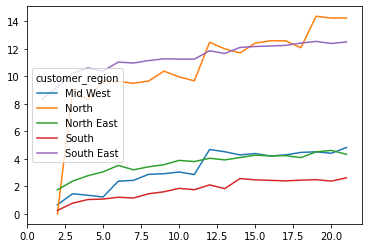

In [ ]:
#% change in health beauty products in 5 regions
beauty_all = pd.pivot_table(data = beauty, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'order_id', aggfunc = 'count')
beauty_all_by_time = beauty_all.pct_change().cumsum().reset_index()
# beauty_all.fillna(value=0, inplace=True)
beauty_all_by_time.plot(kind='line')

Regarding health beauty products, the North had the most significant % change in number of orders for the last 2 years


###Bed_bath_table products in 2 years

In [ ]:
#Filter the customers buying bed bath table products in all 5 regions 
bbt= fl[fl.category_2=='Bed, bath, table']
bbt.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_region,per_period
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,10adb53d8faa890ca7c2f0cbcb68d777,cama_mesa_banho,...,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-27 17:55:14,19.90,12.80,e2dfa3127fedbbca9707b36304996dab,4812,sao paulo,SP,South East,2018-07
18,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,delivered,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11 00:00:00,cce679660c66e6fbd5c8091dfd29e9cd,cama_mesa_banho,...,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-29 00:14:22,17.90,11.85,d0ff1a7468fcc46b8fc658ab35d2a12c,13186,hortolandia,SP,South East,2017-11
40,7206b86ea789983f7a273ea7fa0bc2a8,3391c4bc11a817e7973e498b0b023158,delivered,2018-03-26 17:12:18,2018-03-26 17:28:27,2018-03-28 17:22:53,2018-04-05 22:11:18,2018-04-12 00:00:00,9a469eaf45dfbc43d39ba1977a3c07af,cama_mesa_banho,...,d2374cbcbb3ca4ab1086534108cc3ab7,2018-03-30 17:27:57,36.90,12.79,1b542f810484d8c042aed33a7c61a218,4561,sao paulo,SP,South East,2018-03
63,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,delivered,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18 00:00:00,15a9e834e89eab39d973492882c658d6,cama_mesa_banho,...,a673821011d0cec28146ea42f5ab767f,2017-12-07 02:51:18,79.90,11.76,6da92ae920ab16fc4eceb8fcd7bd43ce,8280,sao paulo,SP,South East,2017-11
96,10c320f977c6a18f91b2d14be13128c6,b673f0597cb0c4d12778f731045f361a,delivered,2017-05-09 20:48:59,2017-05-09 21:02:45,2017-05-10 11:22:15,2017-05-18 13:22:35,2017-06-01 00:00:00,b3be1f83cef05668c25e134852d44545,cama_mesa_banho,...,3b15288545f8928d3e65a8f949a28291,2017-05-16 21:02:45,110.99,21.27,04e495a3f45df8b41be2e934bbc16961,94055,gravatai,RS,South,2017-05


In [ ]:
#% change in bed bath table products in 5 regions
bbt_all = pd.pivot_table(data = bbt, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'customer_id', aggfunc = 'count')

bbt_all_by_time = bbt_all.pct_change().cumsum()
# bbt_all.fillna(value=0, inplace=True)


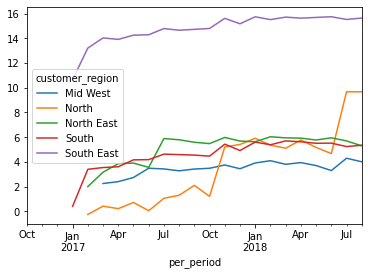

In [ ]:
bbt_all_by_time.plot(kind='line')

Regarding bed bath table products, the South East has the most stable % change in number of orders compared to other regions


###Home office furniture products in 2 years

In [ ]:
#Filter the customers buying health_beauty products in all 5 regions 
hof= fl[fl.category_2=='Home office furniture']
hof.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_region,per_period
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,ac1789e492dcd698c5c10b97a671243a,moveis_decoracao,...,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS,South,2017-01
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,9a78fb9862b10749a117f7fc3c31f051,moveis_escritorio,...,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,South East,2017-07
33,989225ba6d0ebd5873335f7e01de2ae7,816f8653d5361cbf94e58c33f2502a5c,delivered,2017-12-12 13:56:04,2017-12-14 13:54:13,2017-12-16 00:18:57,2018-01-03 18:03:36,2018-01-08 00:00:00,6b64362e89896be7589621df54be089e,moveis_decoracao,...,77530e9772f57a62c906e1c21538ab82,2017-12-20 13:54:13,49.00,14.10,37363700139c1aef873bbcd916e57dfd,5778,sao paulo,SP,South East,2017-12
48,25f4376934e13d3508486352e11a5db0,12fd2740039676063a874b9567dfa651,delivered,2018-05-17 16:59:11,2018-05-18 01:17:39,2018-05-18 13:02:00,2018-05-21 15:22:11,2018-05-25 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,...,955fee9216a65b617aa5c0531780ce60,2018-05-22 01:17:39,69.90,12.43,372e0fc66eacb8698e4f9997d366d961,12230,sao jose dos campos,SP,South East,2018-05
56,e425680f760cbc130be3e53a9773c584,f178c1827f67a8467b0385b7378d951a,delivered,2017-08-31 08:15:24,2017-08-31 08:30:17,2017-08-31 20:06:14,2017-09-04 20:59:55,2017-09-20 00:00:00,9ecadb84c81da840dbf3564378b586e9,moveis_decoracao,...,1025f0e2d44d7041d6cf58b6550e0bfa,2017-09-08 08:30:17,38.40,11.85,9d9ab3b77f0416765b3fbedf94a942a4,12070,taubate,SP,South East,2017-08


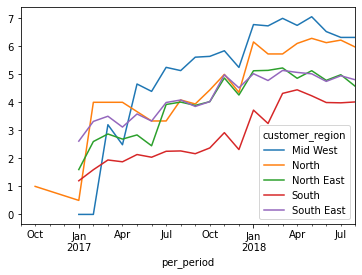

In [ ]:
#% change in home office furniture products in 5 regions

hof_all = pd.pivot_table(data = hof, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'order_id', aggfunc = 'count')
hof_all_by_time = hof_all.pct_change().cumsum()
# hof_all.fillna(value=0, inplace=True)
hof_all_by_time.plot(kind='line')

Regarding home office furniture, Mid West experienced the most significant % change in number of orders

##2.Product features

###Bed bath table

Firstly, we have a look at what categories having the most orders in each region

In [ ]:
fl[fl['customer_region']=='North'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Health, beauty           212
Computers, games         207
Home office furniture    176
Sports, leisure          166
Telephony                155
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='North East'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Health, beauty           1139
Home office furniture     919
Computers, games          900
Watches, gifts            784
Sports, leisure           761
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='Mid West'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Health, beauty           630
Bed, bath, table         578
Sports, leisure          542
Home office furniture    540
Computers, games         485
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='South'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Home office furniture    1774
Bed, bath, table         1412
Computers, games         1353
Sports, leisure          1324
Health, beauty           1170
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='South East'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Bed, bath, table         8435
Home office furniture    7730
Health, beauty           6519
Computers, games         6222
Sports, leisure          5848
Name: order_id, dtype: int64

Regarding bed bath table products, South and South East regions all have them as the top, so we will analyze bed bath table in 2 regions

In [ ]:
#Filter out bed bath table products in Southern regions
bbt_r=bbt[bbt['customer_region'].isin(['South','South East'])]
bbt_r.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_region,per_period
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00,10adb53d8faa890ca7c2f0cbcb68d777,cama_mesa_banho,...,1900267e848ceeba8fa32d80c1a5f5a8,2018-07-27 17:55:14,19.90,12.80,e2dfa3127fedbbca9707b36304996dab,4812,sao paulo,SP,South East,2018-07
18,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,delivered,2017-11-21 00:03:41,2017-11-21 00:14:22,2017-11-23 21:32:26,2017-11-27 18:28:00,2017-12-11 00:00:00,cce679660c66e6fbd5c8091dfd29e9cd,cama_mesa_banho,...,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-29 00:14:22,17.90,11.85,d0ff1a7468fcc46b8fc658ab35d2a12c,13186,hortolandia,SP,South East,2017-11
40,7206b86ea789983f7a273ea7fa0bc2a8,3391c4bc11a817e7973e498b0b023158,delivered,2018-03-26 17:12:18,2018-03-26 17:28:27,2018-03-28 17:22:53,2018-04-05 22:11:18,2018-04-12 00:00:00,9a469eaf45dfbc43d39ba1977a3c07af,cama_mesa_banho,...,d2374cbcbb3ca4ab1086534108cc3ab7,2018-03-30 17:27:57,36.90,12.79,1b542f810484d8c042aed33a7c61a218,4561,sao paulo,SP,South East,2018-03
63,68873cf91053cd11e6b49a766db5af1a,4632eb5a8f175f6fe020520ae0c678f3,delivered,2017-11-30 22:02:15,2017-12-02 02:51:18,2017-12-04 22:07:01,2017-12-05 20:28:40,2017-12-18 00:00:00,15a9e834e89eab39d973492882c658d6,cama_mesa_banho,...,a673821011d0cec28146ea42f5ab767f,2017-12-07 02:51:18,79.90,11.76,6da92ae920ab16fc4eceb8fcd7bd43ce,8280,sao paulo,SP,South East,2017-11
96,10c320f977c6a18f91b2d14be13128c6,b673f0597cb0c4d12778f731045f361a,delivered,2017-05-09 20:48:59,2017-05-09 21:02:45,2017-05-10 11:22:15,2017-05-18 13:22:35,2017-06-01 00:00:00,b3be1f83cef05668c25e134852d44545,cama_mesa_banho,...,3b15288545f8928d3e65a8f949a28291,2017-05-16 21:02:45,110.99,21.27,04e495a3f45df8b41be2e934bbc16961,94055,gravatai,RS,South,2017-05


In [ ]:
#Check the correlation between product attributes and number of orders in bed bath table products
bbt_corr= bbt_r[['product_id','product_name_lenght',	'product_description_lenght',	'product_photos_qty',	'product_weight_g','order_id','volume_cm3','price']]
bbt_num= bbt_corr.groupby('product_id')['product_name_lenght',	'product_description_lenght',	'product_photos_qty',	'product_weight_g','volume_cm3','price','order_id'].agg({'product_name_lenght':'mean',	'product_description_lenght':'mean',	'product_photos_qty':'mean',	'product_weight_g':'mean','volume_cm3':'mean','price':'mean','order_id':'count'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
bbt_num.head().reset_index()


,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,volume_cm3,price,order_id
0,0009406fd7479715e4bef61dd91f2462,50.0,266.0,2.0,300.0,23625.0,229.0,1
1,001b237c0e9bb435f2e54071129237e9,42.0,253.0,1.0,6000.0,4800.0,78.9,1
2,001c5d71ac6ad696d22315953758fa04,50.0,381.0,1.0,1800.0,40467.0,79.9,1
3,0085dddda27567189f1dfd1eda7c286e,58.0,593.0,1.0,1800.0,9600.0,179.8,1
4,00905d58c87afcbce21420b3712cacaa,59.0,253.0,1.0,3875.0,23736.0,159.9,5


In [ ]:
bbt_num.corr().style.background_gradient(cmap='Blues')


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,volume_cm3,price,order_id
product_name_lenght,1.000000,0.045991,0.008375,0.102222,0.030424,0.123628,0.000818
product_description_lenght,0.045991,1.000000,0.270816,0.106007,0.078361,0.110059,-0.011775
product_photos_qty,0.008375,0.270816,1.000000,0.090782,0.160891,0.146428,0.035892
product_weight_g,0.102222,0.106007,0.090782,1.000000,0.678293,0.582014,-0.028333
volume_cm3,0.030424,0.078361,0.160891,0.678293,1.000000,0.536898,-0.026012
price,0.123628,0.110059,0.146428,0.582014,0.536898,1.000000,-0.037778
order_id,0.000818,-0.011775,0.035892,-0.028333,-0.026012,-0.037778,1.000000


For bed bath table products, the product photo quantity has a slight positive correlation with number of orders in 3.5% (more photos, more customers buy orders)

Regarding product description length, product weight, volume and price, they all have a slight negative correlation with number of orders (less weight and volume, cheaper price, more customers buy orders)



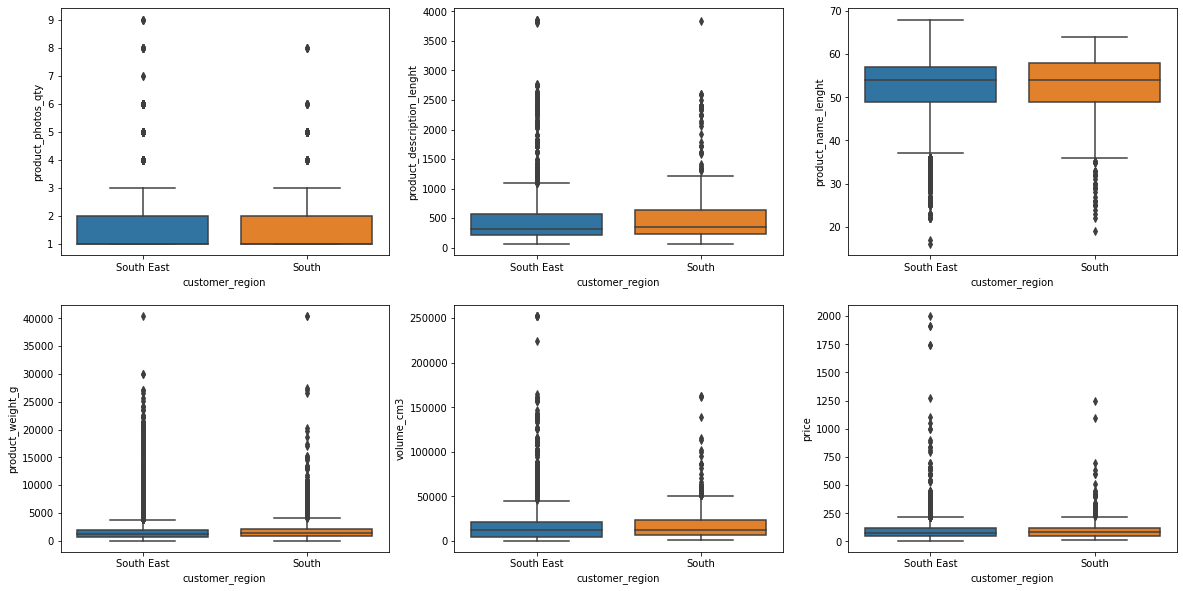

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.boxplot(data = bbt_r, x = 'customer_region', y = 'product_photos_qty')
plt.subplot(232)
sns.boxplot(data = bbt_r, x = 'customer_region', y = 'product_description_lenght')
plt.subplot(233)
sns.boxplot(data = bbt_r, x = 'customer_region', y = 'product_name_lenght')
plt.subplot(234)
sns.boxplot(data = bbt_r, x = 'customer_region', y = 'product_weight_g')
plt.subplot(235)
sns.boxplot(data = bbt_r, x = 'customer_region', y = 'volume_cm3')
plt.subplot(236)
sns.boxplot(data = bbt_r, x = 'customer_region', y = 'price')

Southern regions bed_bath_table products distributions:

- Product photo quantity: 75% quantitle focus on products with 1-2 photos in 2 regions
- Price: 75% quantitle focus on products with the price of 125-200 Brazillian real in 2 regions
- Product description length: 75% quantitle focus on products with the product description length of 600 in South East and 700 in South
- Product name length: 75% quantitle focus on products with the product name length of 60 in 2 regions
- Product weight: 75% quantitle focus on products with the product weight of 2500g in 2 regions
- Product volume: 75% quantitle focus on products with the product volume of 25000cm3 in 2 regions


In [ ]:
#Description table of product attributes in South East
bbt[bbt['customer_region']=='South East'][['product_photos_qty','product_name_lenght','price','product_weight_g','volume_cm3','product_description_lenght']].mean()
 

product_photos_qty                1.475282
product_name_lenght              51.712152
price                            92.310893
product_weight_g               2085.195732
volume_cm3                    16666.234025
product_description_lenght      445.089864
dtype: float64

In [ ]:
#Description table of product attributes in South 
bbt[bbt['customer_region']=='South'][['product_photos_qty','product_name_lenght','price','product_weight_g','volume_cm3','product_description_lenght']].mean()


product_photos_qty                1.550992
product_name_lenght              51.968839
price                            97.038052
product_weight_g               2296.900142
volume_cm3                    17480.925637
product_description_lenght      482.632436
dtype: float64

In [ ]:
bbt_o = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'order_id',
                       aggfunc='count').pct_change().cumsum()

bbt_o

customer_region,South,South East
per_period,,
2016-10,NaN,NaN
2017-01,0.400000,10.666667
2017-02,3.400000,13.209524
2017-03,3.542857,14.032104
2017-04,3.605357,13.912635
2017-05,4.164181,14.254344
2017-06,4.183049,14.288052
2017-07,4.627493,14.788052
2017-08,4.589032,14.655202


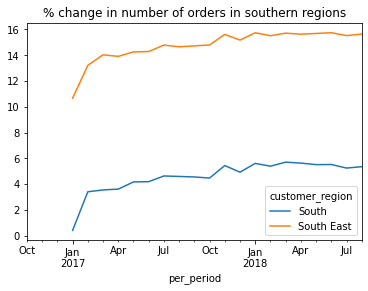

In [ ]:
bbt_o = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'order_id',
                       aggfunc='count').pct_change().cumsum()

bbt_o.plot(kind='line',title='% change in number of orders in southern regions')

% change in number of orders grows stably in both regions, with 4% in the South and 14% in the South East

In [ ]:
#change in product attributes in both regions
bbt_ppq = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_photos_qty',
                       aggfunc='mean').pct_change().cumsum()
bbt_pnl = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_name_lenght',
                       aggfunc='mean').pct_change().cumsum()
bbt_pdl = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_description_lenght',
                       aggfunc='mean').pct_change().cumsum()
bbt_pv = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'volume_cm3',
                       aggfunc='mean').pct_change().cumsum()
bbt_pw = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_weight_g',
                       aggfunc='mean').pct_change().cumsum()
bbt_pp = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'price',
                       aggfunc='mean').pct_change().cumsum()

In [ ]:
#value in product attributes in both regions
bbt_ppqn = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_photos_qty',
                       aggfunc='mean')
bbt_pnln = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_name_lenght',
                       aggfunc='mean')
bbt_pdln = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_description_lenght',
                       aggfunc='mean')
bbt_pvn = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'volume_cm3',
                       aggfunc='mean')
bbt_pwn = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_weight_g',
                       aggfunc='mean')
bbt_ppn = pd.pivot_table(data = bbt_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'price',
                       aggfunc='mean')

In [ ]:
#Focus on the changing the mean price from 10/2016 to 08/2018
bbt_ppn

customer_region,South,South East
per_period,,
2016-10,43.858000,86.566667
2017-01,81.154286,77.619429
2017-02,109.180000,97.353226
2017-03,75.328125,89.410133
2017-04,68.228529,93.564070
2017-05,87.787170,89.141873
2017-06,109.560370,87.928768
2017-07,108.508718,110.950024
2017-08,130.280000,101.910446


In [ ]:
#Focus on the changing the mean name length from 10/2016 to 08/2018
bbt_pnln

customer_region,South,South East
per_period,,
2016-10,59.400000,50.666667
2017-01,54.000000,55.171429
2017-02,54.607143,53.314516
2017-03,52.531250,52.539823
2017-04,51.852941,51.150754
2017-05,53.169811,52.430712
2017-06,53.962963,52.420290
2017-07,53.730769,52.852657
2017-08,53.666667,51.738162


In [ ]:
#Focus on the changing the mean photo quantity from 10/2016 to 08/2018
bbt_ppqn

customer_region,South,South East
per_period,,
2016-10,1.000000,2.000000
2017-01,1.142857,1.514286
2017-02,1.821429,1.354839
2017-03,1.750000,1.269912
2017-04,1.176471,1.432161
2017-05,1.490566,1.378277
2017-06,1.629630,1.597826
2017-07,1.923077,2.014493
2017-08,2.040000,1.771588


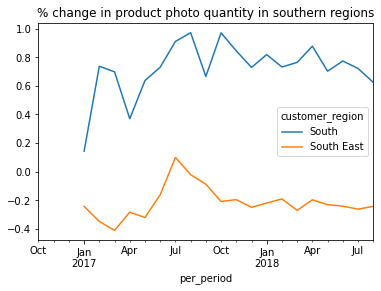

In [ ]:
bbt_ppq.plot(kind='line', title='% change in product photo quantity in southern regions')

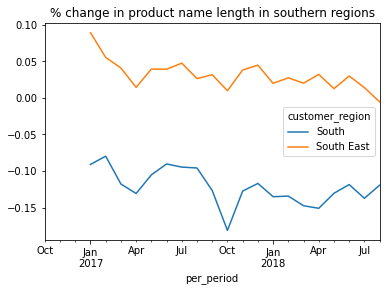

In [ ]:
bbt_pnl.plot(kind='line', title='% change in product name length in southern regions')

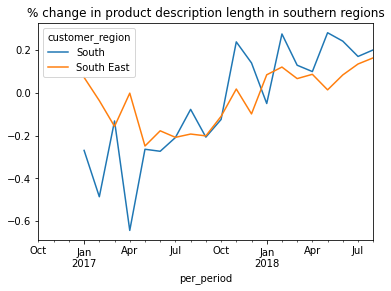

In [ ]:
bbt_pdl.plot(kind='line', title='% change in product description length in southern regions')

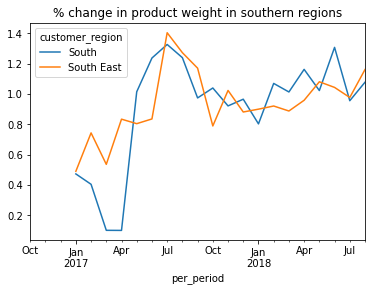

In [ ]:
bbt_pw.plot(kind='line', title='% change in product weight in southern regions')

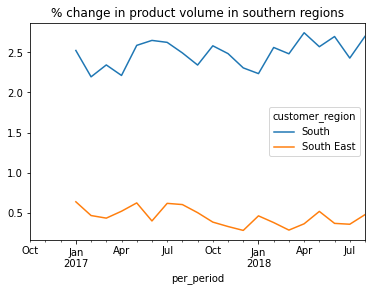

In [ ]:
bbt_pv.plot(kind='line', title='% change in product volume in southern regions')

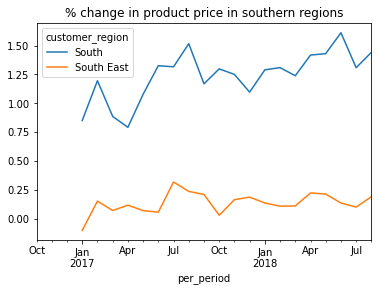

In [ ]:
bbt_pp.plot(kind='line', title='% change in product price in southern regions')

Regarding product attributes, the South East has a rapid growth in product price, weight and volume and number of photos, meanwhile, the %change in name length is decreasing over 2 years 

Over time, South East customers are likely to buy bed bath table products with more photos, concise name length with reasonable volume, weight and price



###Health beauty

Firstly, we have a look at what categories having the most orders in each region

In [ ]:
fl[fl['customer_region']=='North'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Health, beauty           212
Computers, games         207
Home office furniture    176
Sports, leisure          166
Telephony                155
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='North East'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Health, beauty           1139
Home office furniture     919
Computers, games          900
Watches, gifts            784
Sports, leisure           761
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='Mid West'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Health, beauty           630
Bed, bath, table         578
Sports, leisure          542
Home office furniture    540
Computers, games         485
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='South'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Home office furniture    1774
Bed, bath, table         1412
Computers, games         1353
Sports, leisure          1324
Health, beauty           1170
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='South East'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()

category_2
Bed, bath, table         8435
Home office furniture    7730
Health, beauty           6519
Computers, games         6222
Sports, leisure          5848
Name: order_id, dtype: int64

Regarding health beauty products, North, North East and Mid West regions all have health,beauty products as the top, so we will analyze health beauty products in 3 regions 

In [ ]:
#Filter out the product attributes in Northern and Mid West regions for health beauty products
beauty_r= beauty[beauty['customer_region'].isin(['North','North East','Mid West'])]
beauty_r.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_region,per_period
39,434d158e96bdd6972ad6e6d73ddcfd22,2a1dfb647f32f4390e7b857c67458536,delivered,2018-06-01 12:23:13,2018-06-05 03:35:15,2018-06-08 11:49:00,2018-06-18 21:32:52,2018-07-17 00:00:00,c7df652246ed7b3300aaf46960c141e4,beleza_saude,...,a5cba26a62b8b4d0145b68b841e62e7f,2018-06-13 03:35:15,445.00,63.17,5f7d7732b351ce851a158528581af05f,54330,jaboatao dos guararapes,PE,North East,2018-06
120,a6cd683d4bd3b9b1f0aa37b27f8116d3,48f239e15744ed5e7ffbafc6bb6e882b,delivered,2017-01-28 23:45:53,2017-01-29 01:31:48,2017-02-01 14:25:06,2017-02-10 17:30:19,2017-03-10 00:00:00,721b56b7d205d6750e97716593bcb370,beleza_saude,...,5c243662ce92d84573bfaff24c3e3700,2017-02-03 23:45:53,589.90,20.00,169381f51e4c3e926ef199364aeced22,41830,salvador,BA,North East,2017-01
311,ed91235fc08276eed0470b26a6dbd4a3,977275bd3cd425aa9926a3388658f485,delivered,2018-03-09 14:58:05,2018-03-10 14:50:28,2018-03-13 19:18:29,2018-03-29 23:31:48,2018-04-05 00:00:00,bb50f2e236e5eea0100680137654686c,beleza_saude,...,f7ba60f8c3f99e7ee4042fdef03b70c4,2018-03-15 14:50:28,325.00,38.96,e20247a9f1cdb71d4415f2a0903212f9,55030,caruaru,PE,North East,2018-03
393,b52d29abb97a3978df1d8922bfe36fbe,ed034127e0801850ca9162dd9de7a106,delivered,2018-05-09 17:11:41,2018-05-09 17:36:11,2018-05-10 14:28:00,2018-05-21 15:38:36,2018-05-29 00:00:00,5f42d57952b7815098979a5c4fa6f82a,beleza_saude,...,c70c1b0d8ca86052f45a432a38b73958,2018-05-11 17:30:50,110.32,17.16,ee3575d8ee7cd3251e3efd6f9cf23fea,75071,anapolis,GO,Mid West,2018-05
394,b52d29abb97a3978df1d8922bfe36fbe,ed034127e0801850ca9162dd9de7a106,delivered,2018-05-09 17:11:41,2018-05-09 17:36:11,2018-05-10 14:28:00,2018-05-21 15:38:36,2018-05-29 00:00:00,6463e442310f2f4f321c83a32d8c662b,beleza_saude,...,4be6b962d83299498bae2190f95d6566,2018-05-14 17:30:50,138.90,17.16,ee3575d8ee7cd3251e3efd6f9cf23fea,75071,anapolis,GO,Mid West,2018-05


In [ ]:
#Check the correlation between product attributes and number of orders in bed bath table products
beauty_corr= beauty_r[['product_id','product_name_lenght',	'product_description_lenght',	'product_photos_qty',	'product_weight_g','order_id','volume_cm3','price']]
beauty_num= beauty_corr.groupby('product_id')['product_name_lenght',	'product_description_lenght',	'product_photos_qty',	'product_weight_g','volume_cm3','price','order_id'].agg({'product_name_lenght':'mean',	'product_description_lenght':'mean',	'product_photos_qty':'mean',	'product_weight_g':'mean','volume_cm3':'mean','price':'mean','order_id':'count'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
beauty_num.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,volume_cm3,price,order_id
product_id,,,,,,,
00210e41887c2a8ef9f791ebc780cc36,56.0,3893.0,6.0,300.0,6750.0,32.98,2
00878d953636afec00d3e85d55a12e7f,59.0,1631.0,4.0,2550.0,39900.0,100.00,4
0092a9e1c8a471753ed7ffa7eef5086e,48.0,1411.0,1.0,350.0,4096.0,44.90,1
01c69d0fbb0d9d8f42ac171ac1238233,52.0,416.0,1.0,30000.0,251625.0,680.00,1
024553ca83fc6e9ec93f5a9c823d1834,41.0,1572.0,1.0,2000.0,5760.0,131.25,1


In [ ]:
beauty_num.corr().style.background_gradient(cmap='Blues')

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,volume_cm3,price,order_id
product_name_lenght,1.000000,0.188598,0.142439,0.091175,0.094755,0.047914,0.073264
product_description_lenght,0.188598,1.000000,0.262067,-0.086433,-0.117791,0.134173,0.008298
product_photos_qty,0.142439,0.262067,1.000000,-0.063340,-0.047847,0.128409,0.074589
product_weight_g,0.091175,-0.086433,-0.063340,1.000000,0.943603,0.440756,-0.031156
volume_cm3,0.094755,-0.117791,-0.047847,0.943603,1.000000,0.450274,-0.025547
price,0.047914,0.134173,0.128409,0.440756,0.450274,1.000000,-0.018822
order_id,0.073264,0.008298,0.074589,-0.031156,-0.025547,-0.018822,1.000000


For heath beauty products, product name length and photo quantity have a slight positive correlation with number of orders, meanwhile, product weight, volume and price have a little negative correlation

=> More photos, name length meaning more orders

=> Less weight and volume and price result in more orders

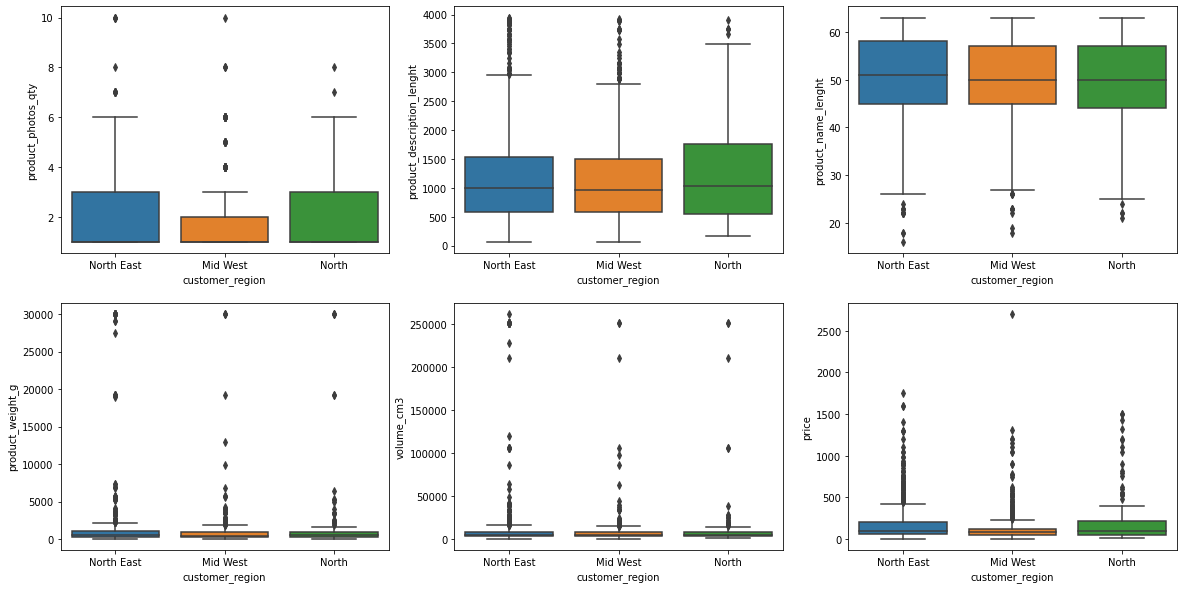

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.boxplot(data = beauty_r, x = 'customer_region', y = 'product_photos_qty')
plt.subplot(232)
sns.boxplot(data = beauty_r, x = 'customer_region', y = 'product_description_lenght')
plt.subplot(233)
sns.boxplot(data = beauty_r, x = 'customer_region', y = 'product_name_lenght')
plt.subplot(234)
sns.boxplot(data = beauty_r, x = 'customer_region', y = 'product_weight_g')
plt.subplot(235)
sns.boxplot(data = beauty_r, x = 'customer_region', y = 'volume_cm3')
plt.subplot(236)
sns.boxplot(data = beauty_r, x = 'customer_region', y = 'price')

Northern and Central regions health_beauty products distributions:

- Product photo quantity: 75% quantitle focus on products with 3 photos in northern regions and 2 photos in mid-west
- Price: 75% quantitle focus on products with the price of 250 real in northern regions and 200 real in mid-west
- Product description length: 75% quantitle focus on products with the product description length of 1500 in North East and Mid West and 1800 in the North
- Product name length: 75% quantitle focus on products with the product name length of 60 in 3 regions
- Product weight: 75% quantitle focus on products with the product weight of 1000g in 3 regions
- Product volume: 75% quantitle focus on products with the product volume of 10000cm3 in 2 regions


In [ ]:
#Description table of product attributes in North
beauty[beauty['customer_region']=='North'][['product_photos_qty','product_name_lenght','price','product_weight_g','volume_cm3','product_description_lenght']].mean()


product_photos_qty                2.084906
product_name_lenght              49.231132
price                           199.218774
product_weight_g               1382.235849
volume_cm3                    10565.971698
product_description_lenght     1268.028302
dtype: float64

In [ ]:
#Description table of product attributes in North East
beauty[beauty['customer_region']=='North East'][['product_photos_qty','product_name_lenght','price','product_weight_g','volume_cm3','product_description_lenght']].mean()


product_photos_qty                2.066725
product_name_lenght              49.956980
price                           175.826699
product_weight_g               1490.604917
volume_cm3                    11553.853380
product_description_lenght     1244.891133
dtype: float64

In [ ]:
#Description table of product attributes in Mid West
beauty[beauty['customer_region']=='Mid West'][['product_photos_qty','product_name_lenght','price','product_weight_g','volume_cm3','product_description_lenght']].mean()


product_photos_qty               1.773016
product_name_lenght             49.506349
price                          134.549968
product_weight_g               912.769841
volume_cm3                    7544.447619
product_description_lenght    1175.096825
dtype: float64

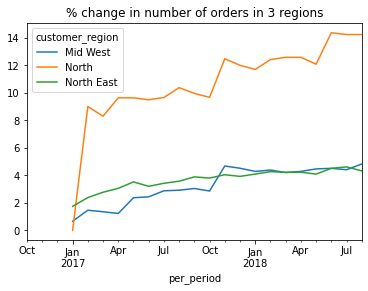

In [ ]:
beauty_o = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'order_id',
                       aggfunc='count').pct_change().cumsum()

beauty_o.plot(kind='line',title='% change in number of orders in 3 regions')

Regarding % change in number of orders, the North was growing significantly and maintained a stable 10-14% change in orders, ahead of other 2 regions

In [ ]:
# % change in product attributes for 3 regions
beauty_ppq = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_photos_qty',
                       aggfunc='mean').pct_change().cumsum()
beauty_pnl = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_name_lenght',
                       aggfunc='mean').pct_change().cumsum()
beauty_pdl = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_description_lenght',
                       aggfunc='mean').pct_change().cumsum()
beauty_pv = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'volume_cm3',
                       aggfunc='mean').pct_change().cumsum()
beauty_pw = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_weight_g',
                       aggfunc='mean').pct_change().cumsum()
beauty_pp = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'price',
                       aggfunc='mean').pct_change().cumsum()

In [ ]:
# % change in product attributes for 3 regions
beauty_ppqn = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_photos_qty',
                       aggfunc='mean')
beauty_pnln = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_name_lenght',
                       aggfunc='mean')
beauty_pdl = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_description_lenght',
                       aggfunc='mean')
beauty_pv = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'volume_cm3',
                       aggfunc='mean')
beauty_pw = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_weight_g',
                       aggfunc='mean')
beauty_ppn = pd.pivot_table(data = beauty_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'price',
                       aggfunc='mean')

In [ ]:
#Focus on the changing the mean price from 10/2016 to 08/2018
beauty_ppn

customer_region,Mid West,North,North East
per_period,,,
2016-10,56.566667,39.700000,103.900000
2017-01,151.338000,349.900000,309.580000
2017-02,60.131111,237.647000,195.491667
2017-03,101.881250,51.663333,182.541600
2017-04,105.968571,207.998571,147.875000
2017-05,115.756000,103.560000,202.717660
2017-06,82.985625,107.796667,186.057500
2017-07,212.289565,167.310000,188.385128
2017-08,96.338333,345.386667,205.616889


In [ ]:
#Focus on the changing the mean photo quantity from 10/2016 to 08/2018
beauty_ppqn

customer_region,Mid West,North,North East
per_period,,,
2016-10,1.000000,5.000000,2.000000
2017-01,3.200000,1.000000,1.909091
2017-02,1.888889,3.300000,2.388889
2017-03,2.375000,2.000000,1.960000
2017-04,2.142857,1.142857,1.625000
2017-05,1.866667,1.428571,1.531915
2017-06,2.000000,2.000000,1.906250
2017-07,2.086957,2.142857,2.179487
2017-08,1.583333,1.833333,1.977778


In [ ]:
#Focus on the changing the mean name length quantity from 10/2016 to 08/2018
beauty_pnln

customer_region,Mid West,North,North East
per_period,,,
2016-10,43.666667,56.000000,60.500000
2017-01,51.000000,51.000000,53.181818
2017-02,48.111111,48.700000,47.611111
2017-03,56.125000,51.333333,48.800000
2017-04,45.142857,45.857143,44.687500
2017-05,51.466667,48.000000,48.510638
2017-06,50.375000,50.000000,52.468750
2017-07,47.739130,44.000000,49.564103
2017-08,49.541667,46.166667,51.355556


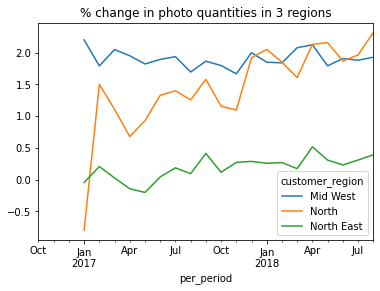

In [ ]:
beauty_ppq.plot(kind='line', title='% change in photo quantities in 3 regions')

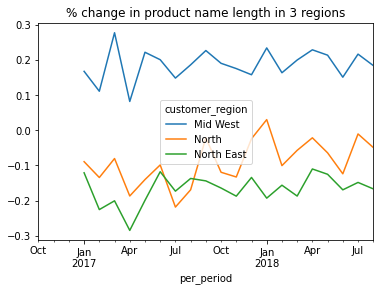

In [ ]:
beauty_pnl.plot(kind='line', title='% change in product name length in 3 regions')

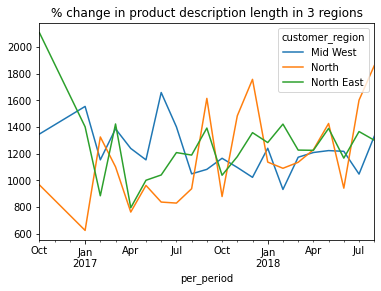

In [ ]:
beauty_pdl.plot(kind='line', title='% change in product description length in 3 regions')

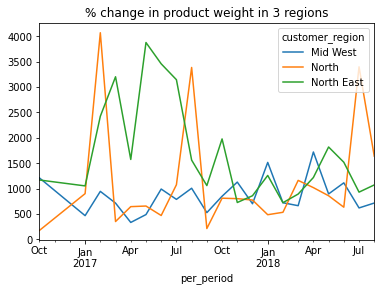

In [ ]:
beauty_pw.plot(kind='line', title='% change in product weight in 3 regions')

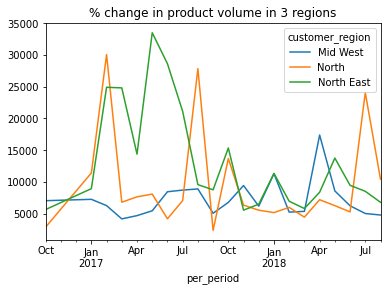

In [ ]:
beauty_pv.plot(kind='line', title='% change in product volume in 3 regions')

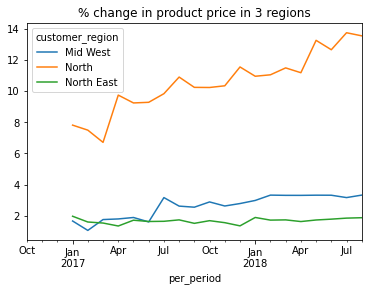

In [ ]:
beauty_pp.plot(kind='line', title='% change in product price in 3 regions')

Regarding product attributes, North region demonstrated significant change ahead 2 other regions, especially price, weight, volume and photo quantity while description length and name length have %change decreasing over time

=> North prefer concise name and description length and less weight, volume and price


###Home office furniture

Firstly, we have a look at what categories having the most orders in each region

In [ ]:
fl[fl['customer_region']=='North'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Health, beauty           212
Computers, games         207
Home office furniture    176
Sports, leisure          166
Telephony                155
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='North East'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Health, beauty           1139
Home office furniture     919
Computers, games          900
Watches, gifts            784
Sports, leisure           761
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='Mid West'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Health, beauty           630
Bed, bath, table         578
Sports, leisure          542
Home office furniture    540
Computers, games         485
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='South'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Home office furniture    1774
Bed, bath, table         1412
Computers, games         1353
Sports, leisure          1324
Health, beauty           1170
Name: order_id, dtype: int64

In [ ]:
fl[fl['customer_region']=='South East'].groupby('category_2')['order_id'].count().sort_values(ascending=False).head()


category_2
Bed, bath, table         8435
Home office furniture    7730
Health, beauty           6519
Computers, games         6222
Sports, leisure          5848
Name: order_id, dtype: int64

Regarding home office furniture, the rank of customer categories preferences are on top in South and South East. We will analyze home office furniture in 2 regions

In [ ]:
#Filter out product attributes in Southern regions for home office furniture products
hof_r= hof[hof['customer_region'].isin(['South','South East'])]
hof_r.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,product_category_name,...,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_region,per_period
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,ac1789e492dcd698c5c10b97a671243a,moveis_decoracao,...,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS,South,2017-01
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,9a78fb9862b10749a117f7fc3c31f051,moveis_escritorio,...,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,South East,2017-07
33,989225ba6d0ebd5873335f7e01de2ae7,816f8653d5361cbf94e58c33f2502a5c,delivered,2017-12-12 13:56:04,2017-12-14 13:54:13,2017-12-16 00:18:57,2018-01-03 18:03:36,2018-01-08 00:00:00,6b64362e89896be7589621df54be089e,moveis_decoracao,...,77530e9772f57a62c906e1c21538ab82,2017-12-20 13:54:13,49.00,14.10,37363700139c1aef873bbcd916e57dfd,5778,sao paulo,SP,South East,2017-12
48,25f4376934e13d3508486352e11a5db0,12fd2740039676063a874b9567dfa651,delivered,2018-05-17 16:59:11,2018-05-18 01:17:39,2018-05-18 13:02:00,2018-05-21 15:22:11,2018-05-25 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,...,955fee9216a65b617aa5c0531780ce60,2018-05-22 01:17:39,69.90,12.43,372e0fc66eacb8698e4f9997d366d961,12230,sao jose dos campos,SP,South East,2018-05
56,e425680f760cbc130be3e53a9773c584,f178c1827f67a8467b0385b7378d951a,delivered,2017-08-31 08:15:24,2017-08-31 08:30:17,2017-08-31 20:06:14,2017-09-04 20:59:55,2017-09-20 00:00:00,9ecadb84c81da840dbf3564378b586e9,moveis_decoracao,...,1025f0e2d44d7041d6cf58b6550e0bfa,2017-09-08 08:30:17,38.40,11.85,9d9ab3b77f0416765b3fbedf94a942a4,12070,taubate,SP,South East,2017-08


In [ ]:
#Check the correlation between product attributes and number of orders in bed bath table products
hof_corr= hof[['product_id','product_name_lenght',	'product_description_lenght',	'product_photos_qty',	'product_weight_g','order_id','volume_cm3','price']]
hof_num= hof_corr.groupby('product_id')['product_name_lenght',	'product_description_lenght',	'product_photos_qty',	'product_weight_g','volume_cm3','order_id','price'].agg({'product_name_lenght':'mean',	'product_description_lenght':'mean',	'product_photos_qty':'mean',	'product_weight_g':'mean','volume_cm3':'mean','price':'mean','order_id':'count'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
hof_num.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,volume_cm3,price,order_id
product_id,,,,,,,
001b72dfd63e9833e8c02742adf472e3,45.0,520.0,3.0,600.0,4576.0,34.99,14
002959d7a0b0990fe2d69988affcbc80,54.0,1750.0,3.0,2600.0,22050.0,129.90,1
003938452c98ff9ab28e9e7b4bfe97ab,52.0,420.0,2.0,5050.0,20000.0,179.90,1
004154251837f6ac124ad4374b3a8148,51.0,1470.0,3.0,150.0,1750.0,14.90,1
004552d98c5d3653af8b4dbe8def0048,50.0,319.0,1.0,900.0,13200.0,349.90,1


In [ ]:
hof_num.corr().style.background_gradient(cmap='Blues')

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,volume_cm3,price,order_id
product_name_lenght,1.000000,0.119233,0.151406,-0.101710,-0.105780,-0.009619,-0.022959
product_description_lenght,0.119233,1.000000,0.001659,0.086182,0.035818,0.097793,-0.011413
product_photos_qty,0.151406,0.001659,1.000000,-0.085468,-0.090195,0.005494,-0.004226
product_weight_g,-0.101710,0.086182,-0.085468,1.000000,0.830115,0.536483,-0.001275
volume_cm3,-0.105780,0.035818,-0.090195,0.830115,1.000000,0.491099,-0.000526
price,-0.009619,0.097793,0.005494,0.536483,0.491099,1.000000,-0.038284
order_id,-0.022959,-0.011413,-0.004226,-0.001275,-0.000526,-0.038284,1.000000


For home office furniture products, the product name length and description length along with price have a slight negative correlation with number of orders

=> Customers are likely to buy home office furniture products with less word length and cheaper price (Products with concise name and cheaper price result in high number of orders)

In [ ]:
hof_r[hof_r['customer_region']=='South'][['product_name_lenght','product_photos_qty','price','product_weight_g','volume_cm3','product_description_lenght']].mean()

product_name_lenght              49.344983
product_photos_qty                2.200113
price                           106.594431
product_weight_g               3950.031567
volume_cm3                    28490.151635
product_description_lenght      828.584555
dtype: float64

In [ ]:
hof_r[hof_r['customer_region']=='South East'][['product_name_lenght','product_photos_qty','price','product_weight_g','volume_cm3','product_description_lenght']].mean()

product_name_lenght              48.548900
product_photos_qty                2.269082
price                           100.854083
product_weight_g               4354.461190
volume_cm3                    29390.713454
product_description_lenght      791.110220
dtype: float64

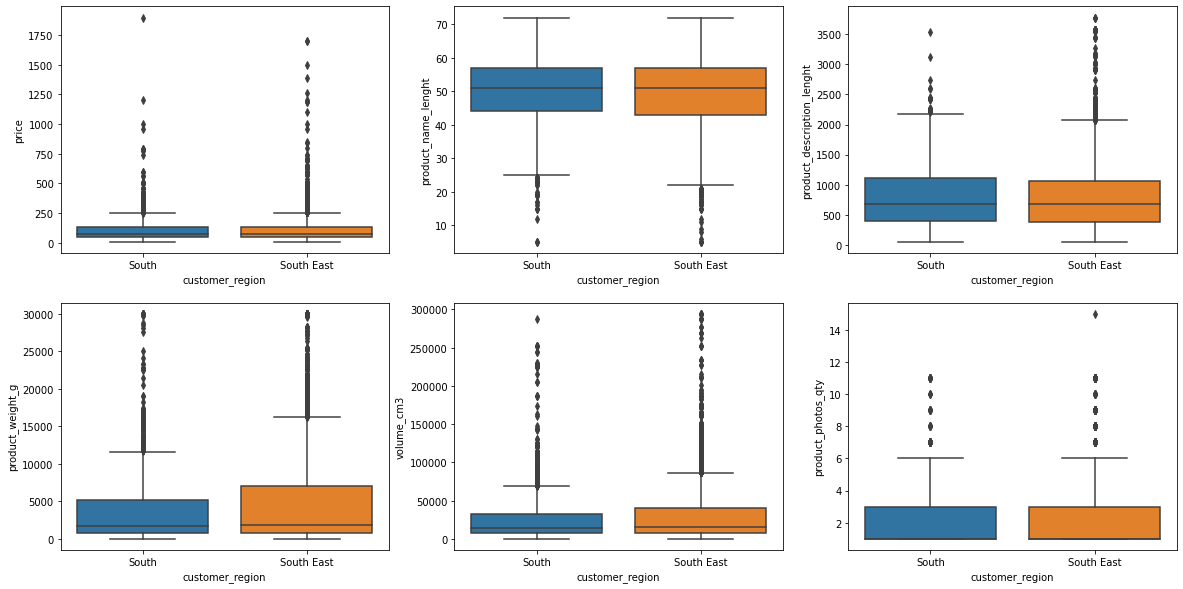

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(231)
sns.boxplot(data = hof_r, x = 'customer_region', y = 'price')
plt.subplot(232)
sns.boxplot(data = hof_r, x = 'customer_region', y = 'product_name_lenght')
plt.subplot(233)
sns.boxplot(data = hof_r, x = 'customer_region', y = 'product_description_lenght')
plt.subplot(234)
sns.boxplot(data = hof_r, x = 'customer_region', y = 'product_weight_g')
plt.subplot(235)
sns.boxplot(data = hof_r, x = 'customer_region', y = 'volume_cm3')
plt.subplot(236)
sns.boxplot(data = hof_r, x = 'customer_region', y = 'product_photos_qty')

Southern regions home office furniture products distributions:

- Product photo quantity: 75% quantitle focus on products with 3 photos in 2 regions
- Price: 75% quantitle focus on products with the price of around 200-250 Brazillian real in 2 regions
- Product description length: 75% quantitle focus on products with the product description length of 1100 in 2 regions
- Product name length: 75% quantitle focus on products with the product name length of 45-60 in 2 regions
- Product weight: 75% quantitle focus on products with the product weight of 5000 in the South and 6000 in the South East
- Product volume: 75% quantitle focus on products with the product volume of 30000cm3 in the South and 40000cm3 in the South East


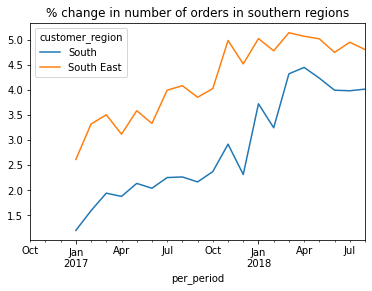

In [ ]:
hof_o = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'order_id',
                       aggfunc='count').pct_change().cumsum()
hof_o.plot(kind='line',title='% change in number of orders in southern regions')

% change in number of orders grows stably in both regions, with 4% in the South and 5% in the South East. South grows from 1.5% to 4%, meanwhile, South East grows from 2.5% to 5%

In [ ]:
#% change in product attributes in southern regions
hof_ppq = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_photos_qty',
                       aggfunc='mean').pct_change().cumsum()
hof_pnl = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_name_lenght',
                       aggfunc='mean').pct_change().cumsum()
hof_pdl = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_description_lenght',
                       aggfunc='mean').pct_change().cumsum()
hof_pv = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'volume_cm3',
                       aggfunc='mean').pct_change().cumsum()
hof_pw = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_weight_g',
                       aggfunc='mean').pct_change().cumsum()
hof_pp = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'price',
                       aggfunc='mean').pct_change().cumsum()

In [ ]:
#% value in product attributes in southern regions
hof_ppqn = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_photos_qty',
                       aggfunc='mean')
hof_pnln = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_name_lenght',
                       aggfunc='mean')
hof_pdln = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_description_lenght',
                       aggfunc='mean')
hof_pvn = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'volume_cm3',
                       aggfunc='mean')
hof_pwn = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'product_weight_g',
                       aggfunc='mean')
hof_ppn = pd.pivot_table(data = hof_r, 
                       index = 'per_period', 
                       columns = 'customer_region', 
                       values = 'price',
                       aggfunc='mean')

In [ ]:
#Focus on the changing the mean price from 10/2016 to 08/2018
hof_ppn

customer_region,South,South East
per_period,,
2016-10,144.543333,86.735455
2017-01,52.908788,80.630314
2017-02,137.463043,97.301402
2017-03,106.444839,86.636449
2017-04,123.111724,118.983553
2017-05,91.636986,110.860138
2017-06,78.538939,94.444630
2017-07,86.291625,99.471031
2017-08,99.398272,90.440716


In [ ]:
#Focus on the changing the mean photo quantity from 10/2016 to 08/2018
hof_ppqn

customer_region,South,South East
per_period,,
2016-10,2.800000,2.204545
2017-01,1.393939,1.911950
2017-02,1.978261,2.250923
2017-03,1.774194,2.308411
2017-04,2.086207,2.294416
2017-05,2.369863,2.117647
2017-06,2.212121,2.101852
2017-07,2.750000,1.994429
2017-08,2.222222,2.260870


In [ ]:
#Focus on the changing the mean name length from 10/2016 to 08/2018
hof_pnln

customer_region,South,South East
per_period,,
2016-10,48.933333,50.136364
2017-01,50.363636,53.566038
2017-02,49.500000,48.343173
2017-03,47.806452,47.532710
2017-04,46.241379,49.192893
2017-05,48.301370,47.702422
2017-06,52.424242,47.768519
2017-07,48.287500,49.454039
2017-08,50.123457,50.140665


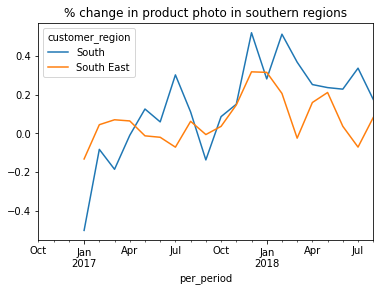

In [ ]:
hof_ppq.plot(kind='line', title='% change in product photo in southern regions')

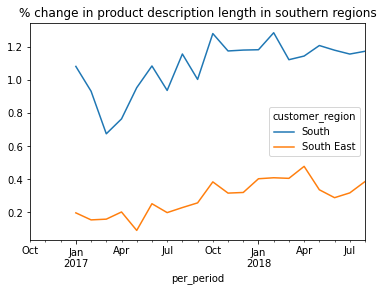

In [ ]:
hof_pdl.plot(kind='line', title='% change in product description length in southern regions')

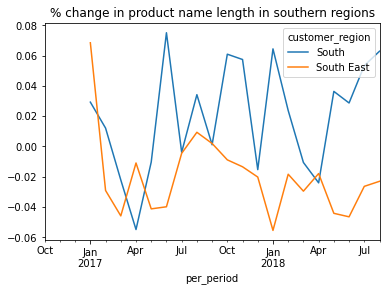

In [ ]:
hof_pnl.plot(kind='line', title='% change in product name length in southern regions')

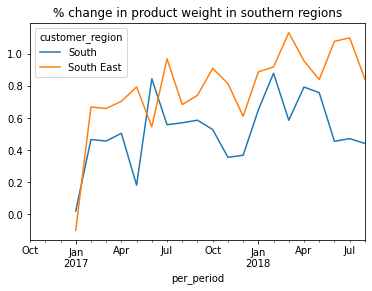

In [ ]:
hof_pw.plot(kind='line', title='% change in product weight in southern regions')

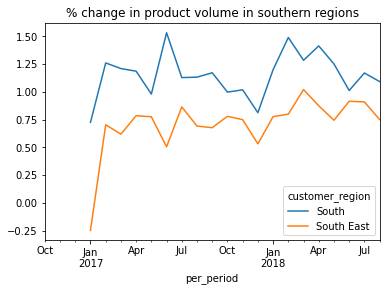

In [ ]:
hof_pv.plot(kind='line', title='% change in product volume in southern regions')

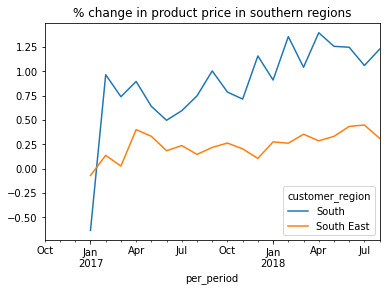

In [ ]:
hof_pp.plot(kind='line', title='% change in product price in southern regions')

South and South East perform a very upward change in all product attributes. Also, a rise in number of photo quantity, name length and description length from customer in the South meanwhile the South East remains stable over 2 years

=> South East region are likely to buy home office furniture with more photos, less name length and stable price

Conclusion:

=> North: Health, beauty

price and photo quantity show increasing trend while name length shows decreasing trend over time (​Try adding more photos of products, shortening their names and offering products with price higher than 200 R$)

=> South East: Bed, bath, table and home office furniture

stable growth in product price, however photo quanity and name length show decreasing trend (​Try using only 1-2 photos of products and shorten their names (between 48-50 words), offering product with price higher than 86 R$)


##3.Export to GDS

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# # # # Create a new Google Spreadsheets
# # # sh = gc.create('Brazil_Olist')

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    sh = gc.open_by_key(gsheet_key)
    worksheet = sh.add_worksheet(worksheet_name, 1000, 50)
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet
    set_with_dataframe(worksheet, data)

In [ ]:
#@title Export data to new sheet
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'top5_re', top5_re)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'top5_c', top5_c)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'south_east_or', south_east_or)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'south_or', south_or)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'north_east_or', north_east_or)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'mid_west_or', mid_west_or)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'north_or', north_or)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'c_all_by_time', c_all_by_time)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'beauty_all_by_time',beauty_all_by_time)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_all_by_time',bbt_all_by_time) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'hof_all_by_time',hof_all_by_time) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_num',bbt_num) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt',bbt)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'all_bbt_n',all_bbt_n) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_cluster_by_time',bbt_cluster_by_time)
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'c_num',c_num) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'all_c_p',all_c_p) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'c_cluster_by_time',c_cluster_by_time) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_o',bbt_o) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_ppq',bbt_ppq) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_pdl',bbt_pdl) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_pnl',bbt_pnl) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_corr',bbt_num.corr().reset_index()) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_pw',bbt_pw) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_pv',bbt_pv) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'bbt_pp',bbt_pp) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'beauty_num',beauty_num.corr().reset_index()) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'beauty_o',beauty_o) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'beauty_pp',beauty_pp) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'beauty_pnl',beauty_pnl) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'beauty_pdl',beauty_pdl) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'beauty_ppq',beauty_ppq) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'beauty_pw',beauty_pw) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'beauty_pv',beauty_pv) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'beauty_pv',beauty_pv) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'hof_n',hof_num.corr().reset_index()) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'hof_o',hof_o) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'hof_ppq',hof_ppq) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'hof_pnl',hof_pnl) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'hof_pdl',hof_pdl) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'hof_pv',hof_pv) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'hof_pw',hof_pw) 
# export_data_to_new_sheet('11dAmr5jAsVaigWWJqb7myyWdCOdDJ9A3QG6RGgm7Uls', 'hof_pp',hof_pp) 



##4.External research on Brazil regions and Olist

Brazil culture by regions:

- https://www.britannica.com/place/Brazil/Cultural-life

- https://www.worldatlas.com/articles/the-five-regions-of-brazil.html

- https://theculturetrip.com/south-america/brazil/articles/a-region-by-region-guide-to-brazils-diverse-cultures/

- https://culturalatlas.sbs.com.au/brazilian-culture/brazilian-culture-core-concepts

Olist background:
- https://valorcapitalgroup.com/case-studies/olist-redesigned-the-marketplace-business-model-to-fit-the-realities-of-ecommerce-in-brazil/#:~:text=In%202016%2C%20Olist%20set%20out,middleware%20between%20marketplaces%20and%20merchants.

- https://techcrunch.com/2021/04/15/goldman-sachs-leads-23m-in-funding-for-brazilian-e-commerce-startup-olist/





